In [1]:
import os
import numpy as np
import pandas as pd
import talib
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time


C:\Users\gantm\Anaconda3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C://Users//gantm//OneDrive//文件//im report.csv", parse_dates=True, index_col = 'monyr')

In [3]:
data.head()

,banking_portfolio_return,Entertainment_portfolio_return,ev_portfolio_return,Total_Portfolio
monyr,,,,
2014-02-01,0.000000,-2.95830,-1.93844,-1.632247
2014-03-01,0.000000,1.46595,4.88721,2.117720
2014-04-01,-1.231369,-0.60412,8.62065,2.261720
2014-05-01,0.000000,-3.37922,-1.85013,-1.743117
2014-06-01,0.000000,1.41200,-2.60378,-0.397260


In [4]:
df_inSample = data[:int(np.round(0.7*len(data)))]

In [5]:
np.cumsum(df_inSample['Total_Portfolio'])

monyr
2014-02-01    -1.632247
2014-03-01     0.485473
2014-04-01     2.747194
2014-05-01     1.004077
2014-06-01     0.606817
                ...    
2019-12-01    16.841583
2020-01-01    19.302677
2020-02-01    13.729140
2020-03-01    10.496873
2020-04-01    -8.574267
Name: Total_Portfolio, Length: 75, dtype: float64

In [6]:
pd.DataFrame({'profit':np.cumsum(df_inSample['Total_Portfolio'])}, index=df_inSample.index)

,profit
monyr,
2014-02-01,-1.632247
2014-03-01,0.485473
2014-04-01,2.747194
2014-05-01,1.004077
2014-06-01,0.606817
...,...
2019-12-01,16.841583
2020-01-01,19.302677
2020-02-01,13.729140


In [7]:
equity = pd.DataFrame({'profit':np.cumsum(df_inSample['Total_Portfolio'])}, index=df_inSample.index)
equity['equity'] = equity['profit'] + 100
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
equity['mon_ret'] = data['Total_Portfolio']
ret = equity['profit'][-1]  #總報酬(未年化)
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
profit = equity['profit'].iloc[-1]
yearstd = equity['mon_ret'].std()*12**0.5  #年化波動度=日報酬標準差*(交易天數)^0.5
annualizedreturn = ret*12/len(df_inSample)   #年化報酬，以單利計算
sharperatio = annualizedreturn / yearstd   #年化報酬率 / 年化波動度

In [8]:

print(f'return: {np.round(ret,4)}%')
print(f'annualizedreturn: {np.round(annualizedreturn, 4)}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'yearstd:{yearstd}')
print(f'sharperatio: {sharperatio}')

return: -8.5743%
annualizedreturn: -1.3719%
mdd: 23.73%
yearstd:11.809372703933196
sharperatio: -0.11616896895658865


In [12]:
data

,banking_portfolio_return,Entertainment_portfolio_return,ev_portfolio_return,Total_Portfolio
monyr,,,,
2014-02-01,0.000000,-2.95830,-1.93844,-1.632247
2014-03-01,0.000000,1.46595,4.88721,2.117720
2014-04-01,-1.231369,-0.60412,8.62065,2.261720
2014-05-01,0.000000,-3.37922,-1.85013,-1.743117
2014-06-01,0.000000,1.41200,-2.60378,-0.397260
...,...,...,...,...
2022-08-01,0.056981,5.81305,10.12360,5.331210
2022-09-01,-0.112874,-0.12872,3.35272,1.037042
2022-10-01,0.000000,-4.72430,-3.48294,-2.735747


In [13]:
df_2016_2018 = data.loc['2016-01-01':'2018-12-31']
equity = pd.DataFrame({'Banking':np.cumsum(df_2016_2018['banking_portfolio_return'])})
equity['Entertainment'] = np.cumsum(df_2016_2018['Entertainment_portfolio_return'])
equity['EV'] = np.cumsum(df_2016_2018['ev_portfolio_return'])
equity['Total'] = np.cumsum(df_2016_2018['Total_Portfolio'])

Text(0.5, 0, 'Time')

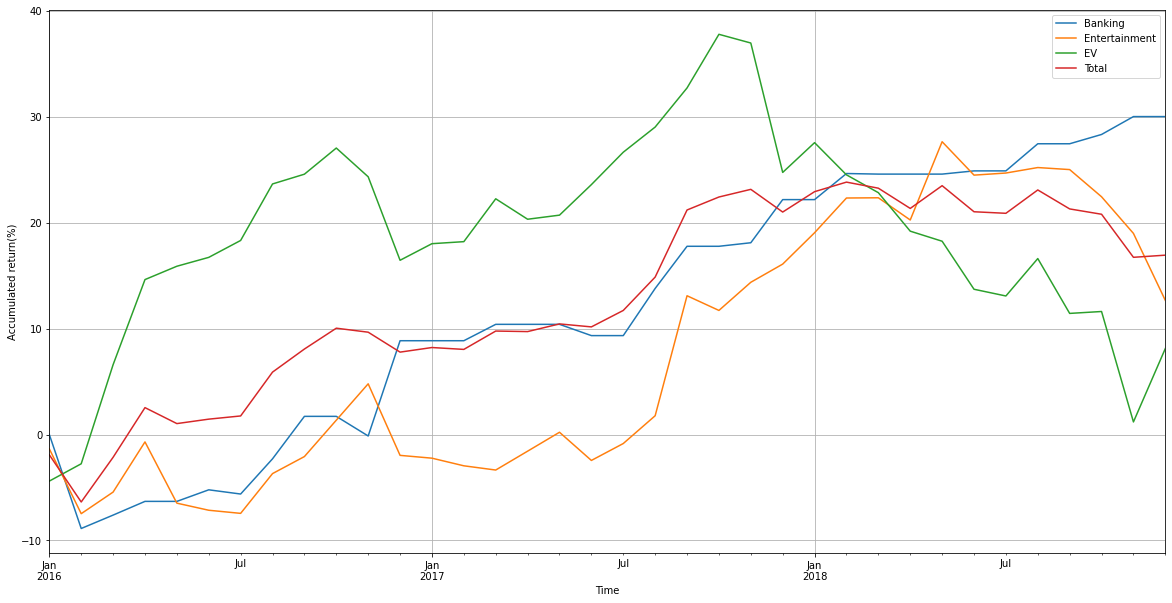

In [14]:
equity['Banking'].plot(figsize=(20,10), grid=True)
equity['Entertainment'].plot(figsize=(20,10), grid=True)
equity['EV'].plot(figsize=(20,10), grid=True)
equity['Total'].plot(figsize=(20,10), grid=True)

plt.legend()
plt.ylabel('Accumulated return(%)')
plt.xlabel('Time')

In [15]:
equity['equity'] = equity['Total'] + 100
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
ret = equity['Total'][-1]  #總報酬(未年化)
mdd = abs(equity['drawdown_percent'].min())


yearstd = equity['Total'].std()*(12**0.5)  #年化波動度=日報酬標準差*(交易天數)^0.5
annualizedreturn = ret*12/len(df_2016_2018)   #年化報酬，以單利計算
calmarRatio = annualizedreturn/100 / mdd
sharperatio = annualizedreturn / yearstd   #年化報酬率 / 年化波動度

In [16]:
print(f'return: {np.round(ret,4)}%')
print(f'annualizedreturn: {np.round(annualizedreturn, 4)}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'yearstd:{yearstd}')
print(f'sharperatio: {sharperatio}')
print(f'calmarRatio: {np.round(calmarRatio,2)}')

return: 16.9289%
annualizedreturn: 5.643%
mdd: 5.7299999999999995%
yearstd:30.758379346638566
sharperatio: 0.18346129042556417
calmarRatio: 0.98


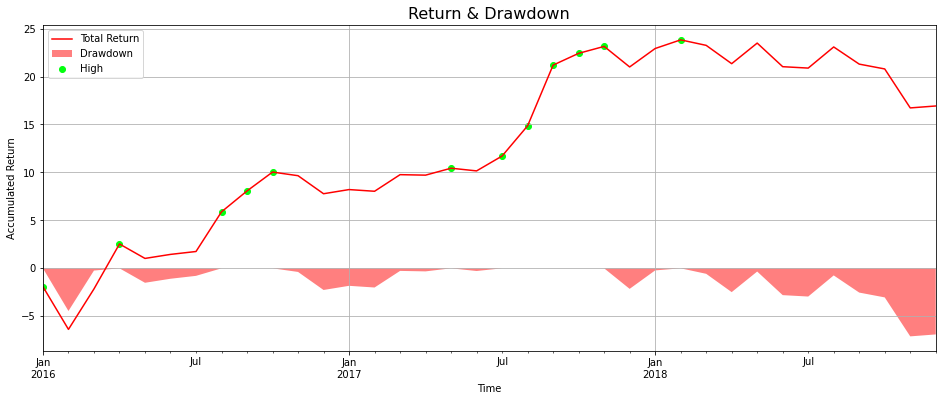

In [17]:
fig, ax = plt.subplots(figsize = (16,6))

high_index = equity[equity['Total'].cummax() == equity['Total']].index
equity['Total'].plot(label = 'Total Return', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['Total'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Return')
plt.xlabel('Time')
plt.title('Return & Drawdown',fontsize  = 16);

In [41]:
high_index

DatetimeIndex(['2016-01-01', '2016-04-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2017-05-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2018-02-01'],
              dtype='datetime64[ns]', name='monyr', freq=None)

In [40]:
equity.to_excel('C://Users//gantm//OneDrive//文件//equity.xlsx', sheet_name='sheet1', index=True)

In [19]:
df_0050 = pd.read_csv("C://Users//gantm//OneDrive//文件//im 0050.csv", parse_dates=True, index_col = 'monyr').loc['2016-01-01':'2018-12-31']

C:\Users\gantm\AppData\Local\Temp\ipykernel_10652\3233360363.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_0050 = pd.read_csv("C://Users//gantm//OneDrive//文件//im 0050.csv", parse_dates=True, index_col = 'monyr').loc['2016-01-01':'2018-12-31']


Text(0.5, 0, 'Time')

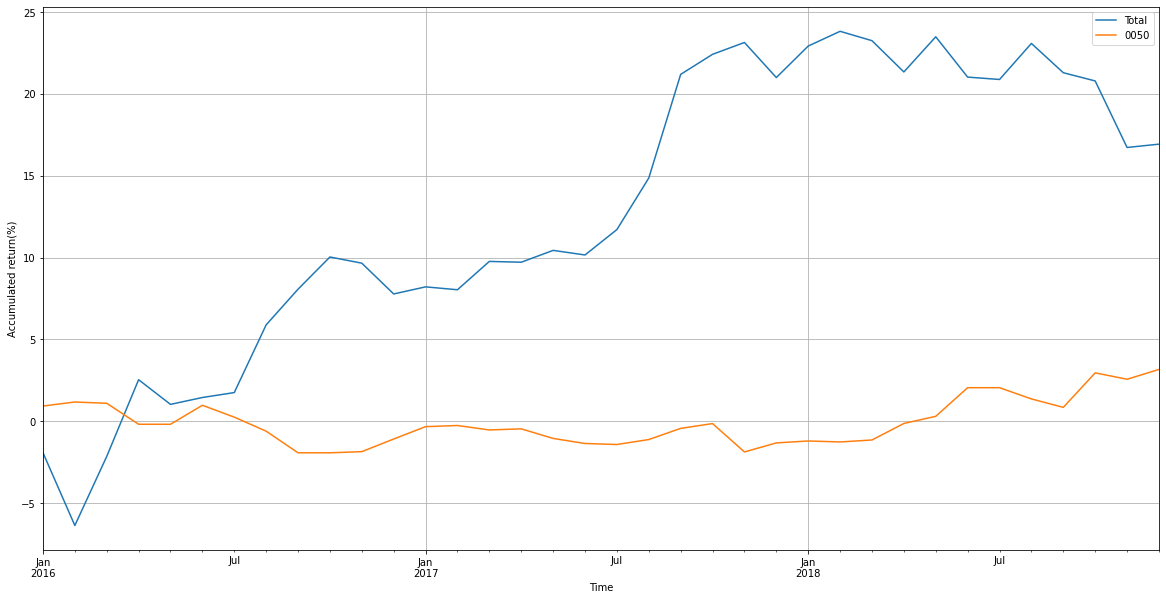

In [23]:
equity['Total'].plot(figsize=(20,10), grid=True)
np.cumsum(df_0050['0050']).plot(figsize=(20,10), grid=True)

plt.legend()
plt.ylabel('Accumulated return(%)')
plt.xlabel('Time')

In [32]:
dif = pd.read_csv("C://Users//gantm//OneDrive//文件//diff curve.csv", parse_dates=True, index_col = 'monyr')

Text(0.5, 0, 'Time')

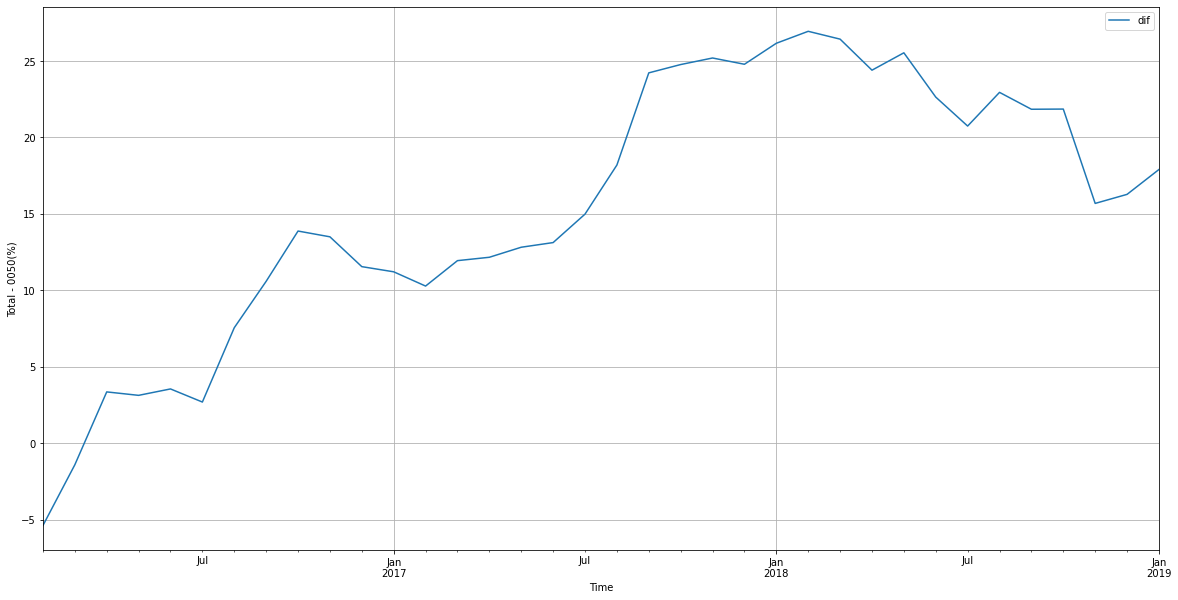

In [35]:
np.cumsum(dif['dif']).plot(figsize=(20,10), grid=True)
plt.legend()
plt.ylabel('Total - 0050(%)')
plt.xlabel('Time')